#### Measurement Framework Library
# MeasurementFramework Pre-work
The Measurement Framework creates and adds a Measurement Node to an experiment. This node is responsible for gathering monitoring metrics and logs. The Measurement Node also makes the gathered data available for analyzing. Grafana and Kibana are the primary means of interacting with the data.
Fabric experiment nodes are protected behind the Bastion host.

MFlib and Fablib use SSH to connect to the nodes in a slice. Fablib takes care traversing SSH through the Bastion Host to the experiement's nodes. The configuration files should have been setup the first time you created a slice.   
For your browser to access Grafana or Kibana running on the Measurement Node, HTTP must be tunneled via SSH from the machine you are using, through the Bastion host and into the Measurement Node. 


## Running Jupyter Notebook on your local machine (Less common configuration)

If you are running Jupyter Notebook on your laptop or desktop, then your fabric_rc configuration file is all you need. No changes are necessary. See the configure_environment.ipynb notebook.

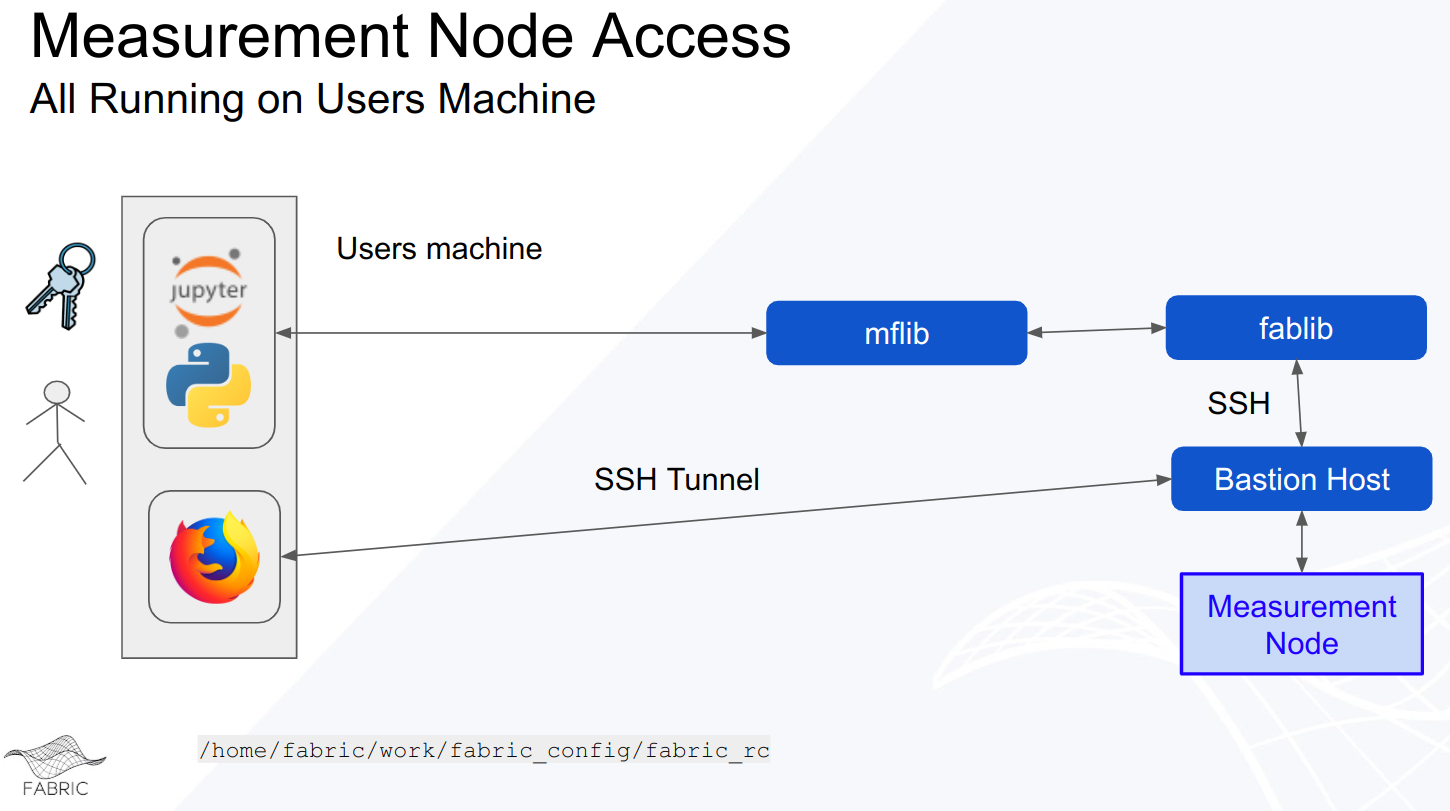

## Running Jupyter Notebook on Fabric's Jupyter Hub web site (Most common configuration)

If you are running your notebook on the [Fabric Jupyter Hub site](https://jupyter.fabric-testbed.net/) you will need to have a copy of your SSH keys on both Jupyter Hub and your laptop. This is because both your local machine and Fabric's Jupyter Hub need to access your nodes via the Bastion host and they are running on two different machines.  
* You are using a Jupyter Hub server to run the jupyter notebooks. The notebook is using SSH via MFLib and Fablib to access the Measurement Node so a set of keys must be on the Jupyter Hub server.  
* You are using your browser on your local machine (usually a laptop) to access Grafana and Kibana running on the Measurement Node. In order to access HTTP sites running on the Measurement Node behind the bastion host you must create an SSH Tunnel so you will need a set of keys on your local machine.


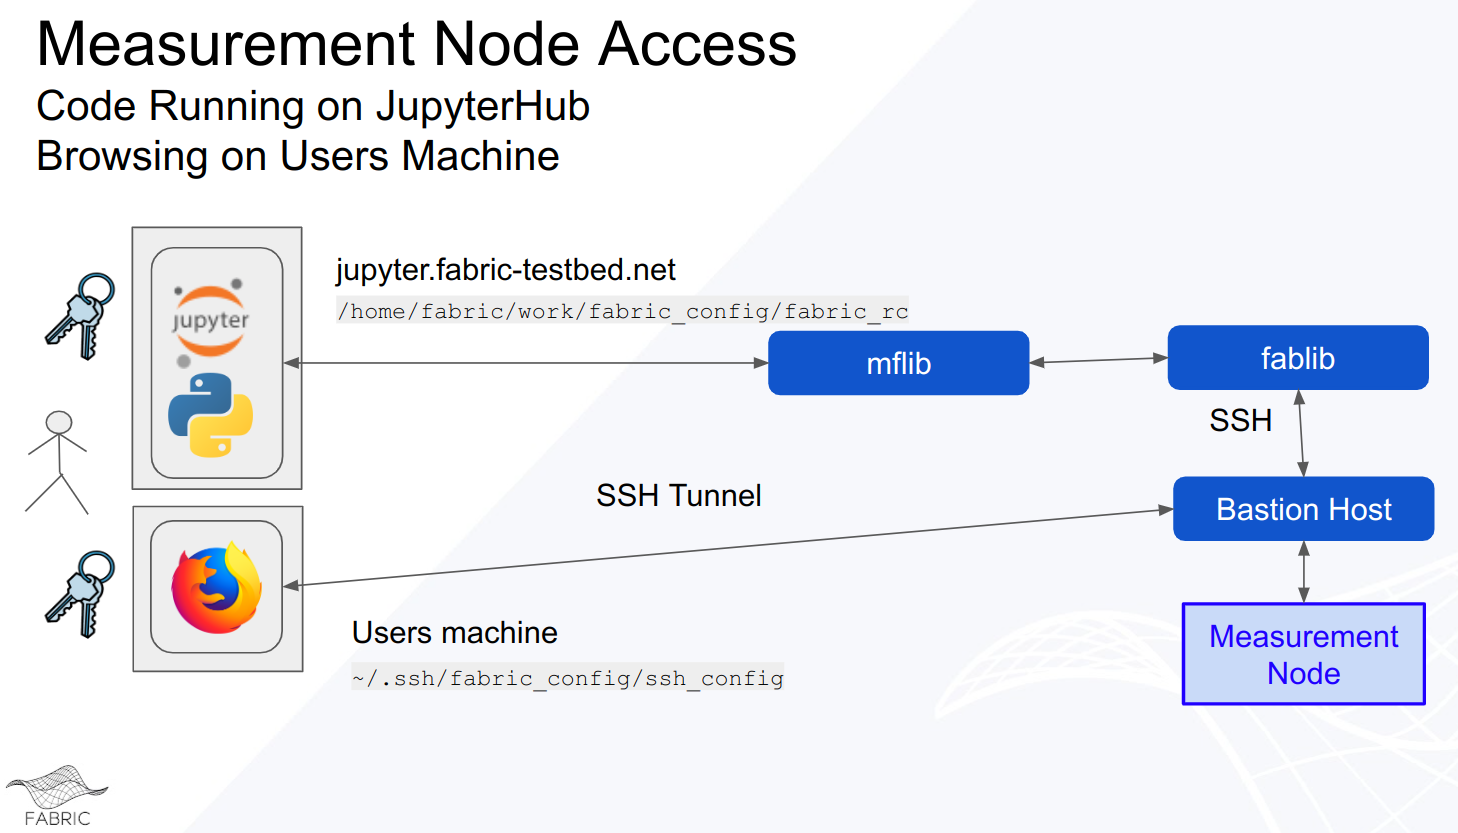

## Configuring Local Machine
Your local machine (laptop or desktop etc..) will need copies of the private keys. These are the Fabric Bastion private key and the Slice private key.

A slightly altered ssh config file will also be needed on your local machine.

The following cells will help you create those and set them up.

#### Create an altered copy of the SSH Config file

In [ ]:
# Open ssh config file on Jupyter Hub
with open("/home/fabric/work/fabric_config/ssh_config") as scf:
    ssh_config_lines = scf.readlines()
import re
# Copy and alter the bastion key location and save to temporary file.
with open("/tmp/tunnel_ssh_config", "w") as tscf:
    
    for line in ssh_config_lines:
        line_out = re.sub("IdentityFile.*", f"IdentityFile ~/fabric_tunnel_config/fabric_bastion_key", line)
        #print(line_out)
        tscf.write( line_out )

#### Tar the needed Slice Key, Bastion Key and SSH Config Files

In [ ]:
%%bash
tar -cvf  fabric_tunnel_config.tar -C /home/fabric/work/fabric_config fabric_bastion_key  -C /home/fabric/work/fabric_config slice_key -C /tmp tunnel_ssh_config 

#### Download the Tar File
The created ```fabric_tunnel_config.tar``` file can be downloaded by right clicking on the filename in the file list and choosing *Download*.

On your local machine, run commands similar to the following to extract the Slice Key, Bastion Key and SSH Config files to fabric_tunnel_config folder in your home directory.
```
mkdir ~/fabric_tunnel_config
tar -xf ~/Downloads/fabric_tunnel.tar -C ~/fabric_tunnel_config.tar
```

#### Using the Keys 
MFLib has 2 methods to create the command lines needed for starting the tunnels for Grafana or Kibana.
```
mf.grafana_tunnel()
mf.kibana_tunnel()
```